## Selection and training of the model using the encoded data.
### The first model will be a linear regression model.

In [50]:
# importing the cleaned data 
import pandas as pd

data = pd.read_csv('../encoded data/enc3.csv')
data

,Unnamed: 0,Age,Income (USD),Income Stability,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,0,56,1933.05,1,14,1,72809.58,241.08,0,0,3.0,809.44,0,2,0,1.0,119933.46,54607.18
1,1,32,4952.91,1,6,1,46837.47,495.81,0,1,1.0,780.40,0,2,0,1.0,54791.00,37469.98
2,3,65,2614.77,0,6,0,80057.92,298.54,0,1,2.0,832.70,1,2,1,1.0,121441.51,56040.54
3,4,31,2614.77,1,6,1,113858.89,491.41,0,1,2.0,745.55,1,0,1,1.0,208567.91,74008.28
4,5,60,1234.92,1,15,0,34434.72,181.48,0,0,2.0,684.12,1,1,0,1.0,43146.82,22382.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20058,29995,38,4969.41,1,10,2,76657.90,722.34,1,1,2.0,869.61,0,2,2,1.0,111096.56,68992.11
20059,29996,20,1606.88,1,8,1,66595.14,253.04,0,0,3.0,729.41,0,1,2,1.0,73453.94,46616.60
20060,29997,49,2417.71,1,14,2,81410.08,583.11,0,1,3.0,677.27,0,0,0,1.0,102108.02,61057.56
20061,29998,38,2417.71,1,16,1,142524.10,378.29,0,1,3.0,677.27,1,2,2,1.0,168194.47,99766.87


In [51]:
# importing and creating the object of the regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [52]:
X = data.drop(['Loan Sanction Amount (USD)', 'Unnamed: 0'], axis=1)
X

,Age,Income (USD),Income Stability,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Location,Co-Applicant,Property Price
0,56,1933.05,1,14,1,72809.58,241.08,0,0,3.0,809.44,0,2,0,1.0,119933.46
1,32,4952.91,1,6,1,46837.47,495.81,0,1,1.0,780.40,0,2,0,1.0,54791.00
2,65,2614.77,0,6,0,80057.92,298.54,0,1,2.0,832.70,1,2,1,1.0,121441.51
3,31,2614.77,1,6,1,113858.89,491.41,0,1,2.0,745.55,1,0,1,1.0,208567.91
4,60,1234.92,1,15,0,34434.72,181.48,0,0,2.0,684.12,1,1,0,1.0,43146.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20058,38,4969.41,1,10,2,76657.90,722.34,1,1,2.0,869.61,0,2,2,1.0,111096.56
20059,20,1606.88,1,8,1,66595.14,253.04,0,0,3.0,729.41,0,1,2,1.0,73453.94
20060,49,2417.71,1,14,2,81410.08,583.11,0,1,3.0,677.27,0,0,0,1.0,102108.02
20061,38,2417.71,1,16,1,142524.10,378.29,0,1,3.0,677.27,1,2,2,1.0,168194.47


In [53]:
Y = data['Loan Sanction Amount (USD)']
Y

0         54607.18
1         37469.98
2         56040.54
3         74008.28
4         22382.57
           ...    
20058     68992.11
20059     46616.60
20060     61057.56
20061     99766.87
20062    117217.90
Name: Loan Sanction Amount (USD), Length: 20063, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [55]:
X_train

,Age,Income (USD),Income Stability,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Location,Co-Applicant,Property Price
2178,18,5151.60,1,8,2,75649.98,402.12,0,1,3.0,820.91,0,0,2,1.0,117238.27
7738,22,3431.20,1,10,1,74208.24,194.77,0,0,1.0,722.22,0,2,0,1.0,123919.69
1923,18,1769.89,1,14,1,41099.61,188.13,0,1,3.0,746.68,0,1,1,1.0,74049.32
16461,29,3099.63,1,14,2,130274.66,684.31,0,0,1.0,807.86,0,1,2,1.0,157120.06
1080,57,3877.44,1,3,1,103586.37,866.85,0,1,2.0,783.21,0,1,1,1.0,153582.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,25,586.78,1,8,0,51873.61,192.19,0,1,1.0,731.64,0,2,0,1.0,81650.22
7291,18,3309.88,1,9,1,233956.59,626.61,0,0,1.0,712.77,0,0,1,1.0,340008.77
17728,30,3021.95,1,14,1,24906.99,225.95,0,1,2.0,803.89,0,0,2,1.0,38005.31
7293,18,4665.76,1,14,1,171069.75,798.03,1,1,2.0,736.94,0,0,0,1.0,305987.52


In [56]:
Y_train.le(0).sum()

0

In [57]:
# training the model
model.fit(X_train, Y_train)

LinearRegression()

In [58]:
# testing the model
predictions = model.predict(X_test)

In [59]:
Y_test[Y_test.le(0)]

Series([], Name: Loan Sanction Amount (USD), dtype: float64)

In [60]:
score = model.score(X_test, Y_test)

from sklearn.metrics import r2_score
r2_score(Y_test, predictions)

0.9532958011377929

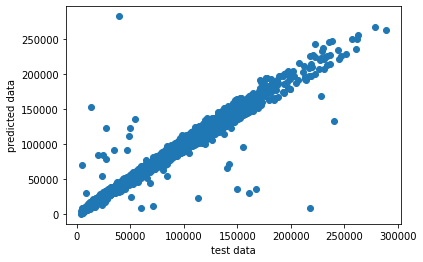

In [61]:
import matplotlib.pyplot as plt

plt.scatter(Y_test, predictions)
plt.xlabel('test data')
plt.ylabel('predicted data')

plt.show()